## Problem 1: Investigation of Life Expectancy

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

### 1. Data-Processing and EDA

In [130]:
od = pd.read_csv('Desktop/Life Expectancy Data.csv')
df = od.drop(columns=['Country'])
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#### 1.1 Remove left spaces in column names for aesthetics..

In [131]:
col_name = df.columns.tolist()
for i in range(len(col_name)):
    col_name[i] = col_name[i].lstrip()
df.columns = col_name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

#### 1.2 Check missing values and fill up

Firstly, we find there are missing values in the dataset. Then from the large value of standard variance of variables with missing value, we choose to fill up the missing value of each variable by their medians. Since in the datasets with high volatility, the median is less affected by extreme values and is more representative.

In [132]:
df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
Year                                 0
HIV/AIDS                             0
Status                               0
Measles                              0
percentage expenditure               0
infant deaths                        0
under-five deaths                    0
dtype: int64

In [133]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [134]:
df_numerical = df.drop(columns=['Status'])
df_numerical.fillna(df_numerical.median(),inplace=True)

In [135]:
df_categorical = df[['Status']]
df_categorical = pd.get_dummies(df_categorical) 
df_new = pd.concat([df_numerical, df_categorical], axis=1)
df_new.to_csv('Desktop/1_new.csv',index=False)

In [136]:
df_new.isnull().sum().sort_values(ascending=False)

Year                               0
Life expectancy                    0
Status_Developed                   0
Schooling                          0
Income composition of resources    0
thinness 5-9 years                 0
thinness  1-19 years               0
Population                         0
GDP                                0
HIV/AIDS                           0
Diphtheria                         0
Total expenditure                  0
Polio                              0
under-five deaths                  0
BMI                                0
Measles                            0
Hepatitis B                        0
percentage expenditure             0
Alcohol                            0
infant deaths                      0
Adult Mortality                    0
Status_Developing                  0
dtype: int64

#### 1.3 EDA

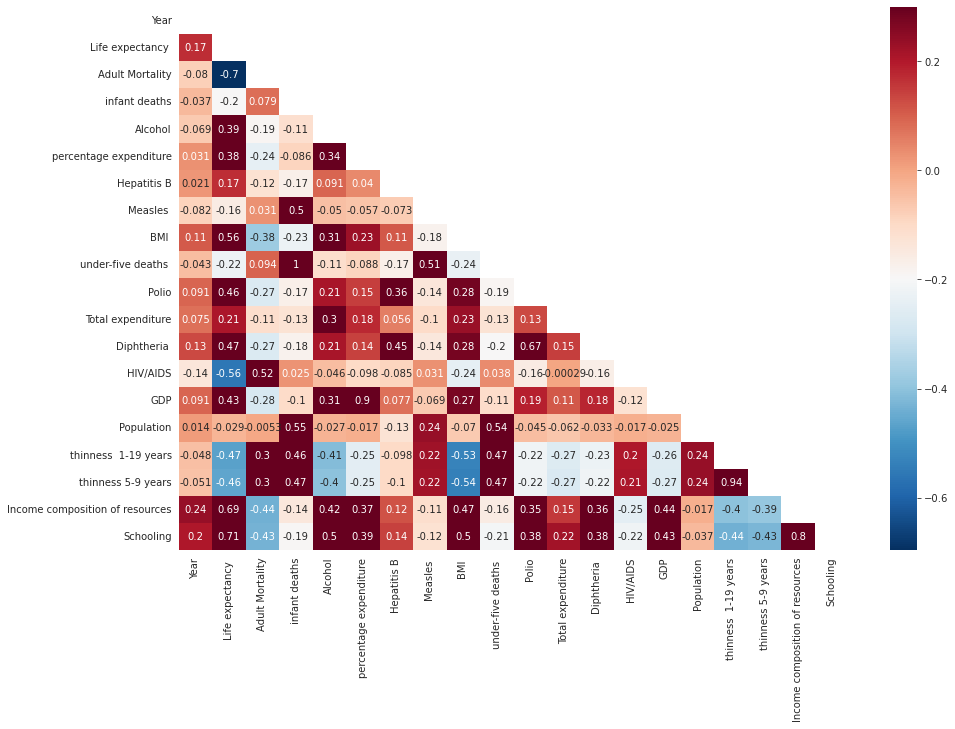

In [137]:
plt.figure(figsize = (15,10))
mask = np.zeros_like(df_numerical.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df_numerical.corr(), mask=mask, vmax=0.3, annot=True, cmap="RdBu_r")

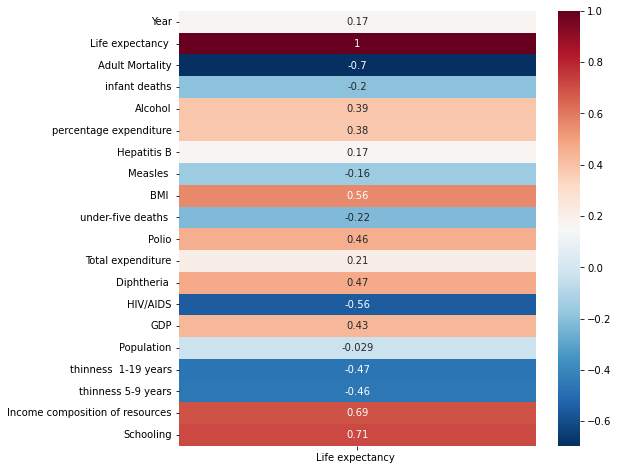

In [138]:
plt.figure(figsize = (8,8))
sns.heatmap(df_numerical.corr()[['Life expectancy ']], annot=True, cmap='RdBu_r')
plt.savefig('2.jpg')

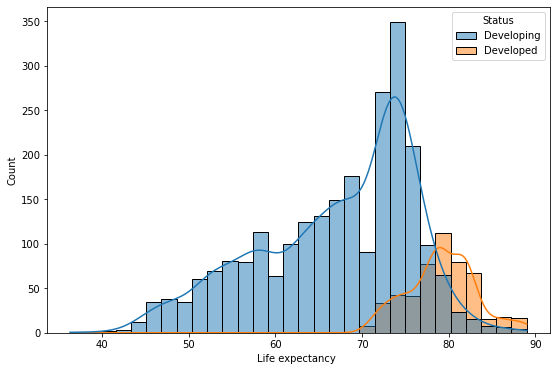

In [139]:
plt.figure(figsize = (9,6))
sns.histplot(x='Life expectancy ', data=df, hue='Status', kde=True)
plt.savefig('3.jpg')

<AxesSubplot:>

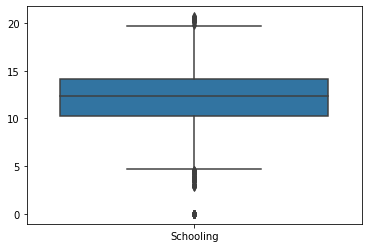

In [140]:
sns.boxplot(data=df_new[['Schooling']])

<AxesSubplot:>

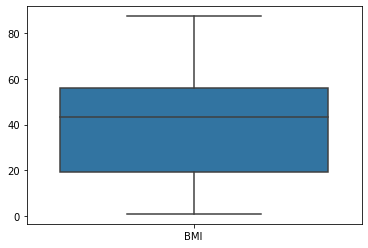

In [141]:
sns.boxplot(data=df_new[['BMI ']])

### 2. Model building

#### 2.1 Full model

In [142]:
x = df_new.drop(columns=['Life expectancy '])
X = sm.add_constant(x)
Y = df_new[['Life expectancy ']]
model = sm.OLS(Y, X)
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     663.7
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:26:07   Log-Likelihood:                -8267.7
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2917   BIC:                         1.670e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              52.2869     23.237      2.250      0.025       6.724      97.850
Year                               -0.0113      0.017     -0.646      0.518      -0.045       0.023
Adult Mortality                    -0.0199      0.001    -25.013      0.000      -0.021      -0.018
infant deaths                       0.0995      0.008     11.788      0.000       0.083       0.116
Alcohol                             0.0588      0.026      2.241      0.025       0.007       0.110
percentage expenditure           3.409e-05   9.07e-05      0.376      0.707      -0.000       0.000
Hepatitis B                        -0.0168      0.004     -4.509      0.000      -0.024      -0.009
Measles                         -1.959e-05   7.66e-06     -2.557      0.011   -3.46e-05   -4.57e-06
BMI                                 0.0449      0.005      9.123      0.000       0.035       0.055
under-five deaths                  -0.0745      0.006    -12.048      0.000      -0.087      -0.062
Polio                               0.0286      0.004      6.421      0.000       0.020       0.037
Total expenditure                   0.0706      0.034      2.052      0.040       0.003       0.138
Diphtheria                          0.0412      0.005      8.856      0.000       0.032       0.050
HIV/AIDS                           -0.4711      0.018    -26.666      0.000      -0.506      -0.436
GDP                               4.33e-05   1.38e-05      3.136      0.002    1.62e-05    7.04e-05
Population                       8.584e-11   1.69e-09      0.051      0.959   -3.23e-09     3.4e-09
thinness  1-19 years               -0.0828      0.050     -1.644      0.100      -0.181       0.016
thinness 5-9 years                  0.0103      0.050      0.207      0.836      -0.087       0.108
Income composition of resources     5.5691      0.637      8.739      0.000       4.319       6.819
Schooling                           0.6607      0.042     15.814      0.000       0.579       0.743
Status_Developed                   26.9439     11.612      2.320      0.020       4.175      49.713
Status_Developing                  25.3430     11.627      2.180      0.029       2.546      48.140
==============================================================================
Omnibus:                      136.524   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.724
Skew:                          -0.189   Prob(JB):                     1.43e-85
Kurtosis:                       4.746   Cond. No.                     8.25e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The s

##### 2.1.1 Result for Quesion 1-4

Orderd by p-value, small to large

In [143]:
coef_df = pd.DataFrame({"coef": round(result.params,4), 
                        "p-value": round(result.pvalues,8) 
                         })
coef_df[['[0.025','0.975]']] = round(result.conf_int(0.05),3)
coef_df[['[0.015','0.985]']] = round(result.conf_int(0.03),3)
coef_df.sort_values(by='p-value', ascending=True)

,coef,p-value,[0.025,0.975],[0.015,0.985]
Polio,0.0286,0.000000,0.020,0.037,0.019,0.038
Schooling,0.6607,0.000000,0.579,0.743,0.570,0.751
Adult Mortality,-0.0199,0.000000,-0.021,-0.018,-0.022,-0.018
infant deaths,0.0995,0.000000,0.083,0.116,0.081,0.118
Income composition of resources,5.5691,0.000000,4.319,6.819,4.185,6.953
BMI,0.0449,0.000000,0.035,0.055,0.034,0.056
under-five deaths,-0.0745,0.000000,-0.087,-0.062,-0.088,-0.061
HIV/AIDS,-0.4711,0.000000,-0.506,-0.436,-0.509,-0.433
Diphtheria,0.0412,0.000000,0.032,0.050,0.031,0.051
Hepatitis B,-0.0168,0.000007,-0.024,-0.009,-0.025,-0.009


#### Question 1:
The summary of the linear model is above, and we choose 0.01 to be the significant level. Then from the summary above, we can get p-value for all variables in the full model, so the variables whose p-value smaller than 0.01 are significant. Besides, although the p-value of GDP smaller than 0.01, its parameter is zero, so GDP does not actually affect the life expectancy.

Therefore, the predicting variables actually affecting the life expectancy include: Polio, Schooling, Adult Mortality, infant deaths, Income composition of resources, BMI, under-five deaths, HIV/AIDS, Diphtheria, Hepatitis B.

#### Question 2:
The 95% confidence intervals for the coefficient of “Adult Mortality” and “HIV/AIDS” are [-0.021, -0.018] and [-0.506, -0.436] respectively.

The parameters “Adult Mortality” and “HIV/AIDS” are -0.0199 and -0.4711 respectively.

The 95% CI of these two predictors are both not conclude zero, which show that the parameters of them are non-zero significantly. And the parameters of them are both negative, so I have 95% confidence to believe “Adult Mortality” and “HIV/AIDS” have negative impact on the life expectancy.

#### Question 3:
The 97% confidence intervals for the coefficient of “Schooling” and “Alcohol” are [0.570, 0.751] and [0.002, 0.116] respectively.

The parameters “Schooling” and “Alcohol” are 0.6607 and 0.0588 respectively.

The 97% CI of these two predictors are both not conclude zero, which show that the parameters of them are non-zero significantly. And the parameters of them are both positive.

So with 97% confidence, “Schooling” and “Alcohol” both have positive impact on life expectancy.


#### Question 4

Based on the p-values, we can choose top-seven most influential predictors from the result of 2.1.1, which are:

Polio, Schooling, Adult Mortality, infant deaths, Income composition of resources, BMI, under-five deaths.

Then use these predictors to fit a smaller model and summary is as follows.


In [144]:
X_new = df_new[['Polio', 'Schooling', 'Adult Mortality', 'infant deaths', 
                        'Income composition of resources', 'BMI ', 'under-five deaths ']]
Y_new = df_new[['Life expectancy ']]

X_small = sm.add_constant(X_new)
Y_small = Y_new

model_small = sm.OLS(Y_small, X_small)
result_small = model_small.fit() 
result_small.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1312.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:26:07   Log-Likelihood:                -8700.7
No. Observations:                2938   AIC:                         1.742e+04
Df Residuals:                    2930   BIC:                         1.747e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.7429      0.520    103.431      0.000      52.724      54.762
Polio                               0.0501      0.004     12.172      0.000       0.042       0.058
Schooling                           0.7628      0.046     16.662      0.000       0.673       0.853
Adult Mortality                    -0.0306      0.001    -38.018      0.000      -0.032      -0.029
infant deaths                       0.1086      0.009     11.686      0.000       0.090       0.127
Income composition of resources     7.8033      0.713     10.939      0.000       6.405       9.202
BMI                                 0.0649      0.005     12.417      0.000       0.055       0.075
under-five deaths                  -0.0824      0.007    -12.015      0.000      -0.096      -0.069
==============================================================================
Omnibus:                      406.126   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1614.585
Skew:                          -0.634   Prob(JB):                         0.00
Kurtosis:                       6.403   Cond. No.                     1.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(df):
    name = df.columns
    x = np.matrix(df)
    VIF_list = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    VIF = pd.DataFrame({'Predictor':name,"VIF":VIF_list})
    max_VIF = max(VIF_list)
    print(max_VIF)
    return VIF
X1 = X.drop(columns=['Status_Developed', 'Status_Developing'])
checkVIF(X1)

216982.22791317024


,Predictor,VIF
0,const,216982.227913
1,Year,1.152733
2,Adult Mortality,1.731160
3,infant deaths,177.429547
4,Alcohol,1.652173
5,percentage expenditure,5.789549
6,Hepatitis B,1.307364
7,Measles,1.381300
8,BMI,1.719163
9,under-five deaths,176.366830


In [146]:
x2 = df_new.drop(columns=['Life expectancy ','Year','thinness 5-9 years','Status_Developing','Population',
                          'percentage expenditure'])
X2 = sm.add_constant(x2)
Y2 = df_new[['Life expectancy ']]
model2 = sm.OLS(Y2, X2)
result2 = model2.fit() 
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     830.5
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:26:08   Log-Likelihood:                -8268.0
No. Observations:                2938   AIC:                         1.657e+04
Df Residuals:                    2921   BIC:                         1.667e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.1309      0.579     95.250      0.000      53.996      56.266
Adult Mortality                    -0.0199      0.001    -25.166      0.000      -0.021      -0.018
infant deaths                       0.1000      0.008     12.070      0.000       0.084       0.116
Alcohol                             0.0626      0.026      2.434      0.015       0.012       0.113
Hepatitis B                        -0.0168      0.004     -4.538      0.000      -0.024      -0.010
Measles                         -1.938e-05   7.64e-06     -2.537      0.011   -3.44e-05    -4.4e-06
BMI                                 0.0446      0.005      9.168      0.000       0.035       0.054
under-five deaths                  -0.0748      0.006    -12.225      0.000      -0.087      -0.063
Polio                               0.0286      0.004      6.430      0.000       0.020       0.037
Total expenditure                   0.0698      0.034      2.069      0.039       0.004       0.136
Diphtheria                          0.0410      0.005      8.852      0.000       0.032       0.050
HIV/AIDS                           -0.4698      0.018    -26.787      0.000      -0.504      -0.435
GDP                              4.768e-05   6.62e-06      7.201      0.000    3.47e-05    6.07e-05
thinness  1-19 years               -0.0740      0.024     -3.104      0.002      -0.121      -0.027
Income composition of resources     5.4982      0.630      8.727      0.000       4.263       6.734
Schooling                           0.6584      0.042     15.835      0.000       0.577       0.740
Status_Developed                    1.6189      0.269      6.020      0.000       1.092       2.146
==============================================================================
Omnibus:                      136.380   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.969
Skew:                          -0.191   Prob(JB):                     3.44e-85
Kurtosis:                       4.741   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
checkVIF(X2)

172.91484060333582


,Predictor,VIF
0,const,60.075987
1,Adult Mortality,1.731832
2,infant deaths,170.979676
3,Alcohol,1.823527
4,Hepatitis B,1.301730
5,Measles,1.375530
6,BMI,1.688988
7,under-five deaths,172.914841
8,Polio,1.935283
9,Total expenditure,1.176826


In [148]:
coef_df2 = pd.DataFrame({"coef": round(result2.params,4), 
                        "p-value": round(result2.pvalues,16)
                         })
coef_df2[['[0.025','0.975]']] = round(result2.conf_int(0.05),3)
coef_df2.sort_values(by='p-value', ascending=True)

,coef,p-value,[0.025,0.975]
const,55.1309,0.000000e+00,53.996,56.266
Adult Mortality,-0.0199,0.000000e+00,-0.021,-0.018
infant deaths,0.1000,0.000000e+00,0.084,0.116
Income composition of resources,5.4982,0.000000e+00,4.263,6.734
HIV/AIDS,-0.4698,0.000000e+00,-0.504,-0.435
BMI,0.0446,0.000000e+00,0.035,0.054
under-five deaths,-0.0748,0.000000e+00,-0.087,-0.063
Schooling,0.6584,0.000000e+00,0.577,0.740
Diphtheria,0.0410,0.000000e+00,0.032,0.050
GDP,0.0000,7.584000e-13,0.000,0.000


In [149]:
x3 = df_new[['Adult Mortality', 'infant deaths', 'Income composition of resources', 'HIV/AIDS', 
             'BMI ', 'under-five deaths ', 'Schooling']]
X3 = sm.add_constant(x3)
Y3 = df_new[['Life expectancy ']]
model3 = sm.OLS(Y3, X3)
result3 = model3.fit() 
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1573.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:26:08   Log-Likelihood:                -8494.2
No. Observations:                2938   AIC:                         1.700e+04
Df Residuals:                    2930   BIC:                         1.705e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              56.0286      0.425    131.828      0.000      55.195      56.862
Adult Mortality                    -0.0220      0.001    -26.122      0.000      -0.024      -0.020
infant deaths                       0.1109      0.009     12.917      0.000       0.094       0.128
Income composition of resources     7.5812      0.665     11.404      0.000       6.278       8.885
HIV/AIDS                           -0.4636      0.019    -24.757      0.000      -0.500      -0.427
BMI                                 0.0615      0.005     12.618      0.000       0.052       0.071
under-five deaths                  -0.0852      0.006    -13.457      0.000      -0.098      -0.073
Schooling                           0.8921      0.042     21.051      0.000       0.809       0.975
==============================================================================
Omnibus:                      173.720   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.399
Skew:                          -0.098   Prob(JB):                    6.68e-154
Kurtosis:                       5.392   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ridge Regression

Text(0.5, 0, 'Lambda')

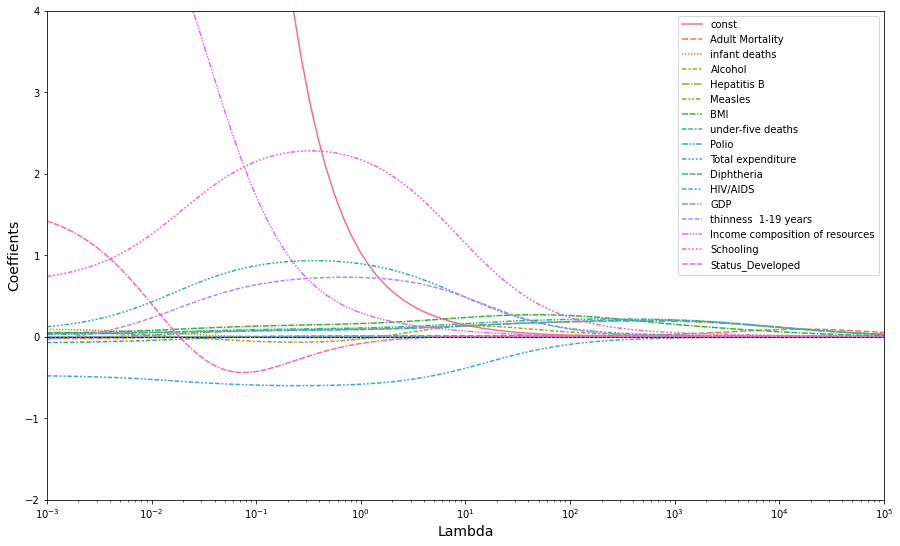

In [150]:
lam=10**np.linspace(-3,5,100)
intercept_dict = {}

for a in lam:
    estimation = model2.fit_regularized(L1_wt=0,alpha=a,refit=True,profile_scale=True)
    intercept_dict[a]=estimation.params 
    
params_rr = pd.DataFrame(intercept_dict).T
params_rr.columns = X2.columns

plt.figure(figsize = (15,9))


sns.lineplot(data = params_rr,dashes=True)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.8,color = 'black')
plt.xticks(lam)

plt.xscale('log')
plt.ylim(-2,4)
plt.xlim(10**(-3),10**5)
plt.ylabel('Coeffients',size=14)
plt.xlabel('Lambda',size=14)

In [151]:
params_rr

,const,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Status_Developed
0.001000,52.054369,-0.018190,0.093125,0.056580,-0.010786,-0.000016,0.049896,-0.069701,0.032431,0.124538,0.042953,-0.477511,0.000046,-0.027651,5.612083,0.742431,1.421418
0.001205,51.468022,-0.017858,0.091828,0.055424,-0.009637,-0.000016,0.050904,-0.068727,0.033165,0.134945,0.043329,-0.478988,0.000045,-0.018811,5.627138,0.758741,1.384254
0.001451,50.779474,-0.017468,0.090307,0.054060,-0.008288,-0.000015,0.052090,-0.067584,0.034027,0.147159,0.043771,-0.480726,0.000045,-0.008430,5.642137,0.778009,1.340816
0.001748,49.974733,-0.017011,0.088534,0.052459,-0.006710,-0.000015,0.053480,-0.066251,0.035036,0.161423,0.044291,-0.482760,0.000045,0.003706,5.656025,0.800686,1.290330
0.002105,49.039377,-0.016481,0.086476,0.050588,-0.004876,-0.000014,0.055100,-0.064704,0.036210,0.177990,0.044897,-0.485130,0.000044,0.017815,5.667271,0.827254,1.232041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47508.101621,0.000627,0.078213,0.007333,0.002729,0.051932,0.000462,0.025424,0.009446,0.052511,0.003765,0.052500,0.000307,0.001621,0.002747,0.000400,0.007630,0.000092
57223.676594,0.000556,0.072542,0.006974,0.002405,0.046085,0.000506,0.022356,0.009088,0.046500,0.003331,0.046492,0.000352,0.001690,0.002471,0.000352,0.006729,0.000079
68926.121043,0.000490,0.066521,0.006554,0.002109,0.040669,0.000550,0.019568,0.008620,0.040957,0.002932,0.040951,0.000373,0.001755,0.002208,0.000309,0.005906,0.000068
83021.756813,0.000430,0.060342,0.006086,0.001840,0.035689,0.000594,0.017047,0.008062,0.035880,0.002568,0.035875,0.000376,0.001816,0.001960,0.000270,0.005158,0.000058


In [152]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error

rcv = RidgeCV(alphas=lam, cv=10)
rcv.fit(X2, Y2)
rcv.alpha_

9.111627561154895

In [153]:
ridge=Ridge(alpha=rcv.alpha_)
r = ridge.fit(X2,Y2)
print(r.coef_)

[[ 0.00000000e+00 -2.00472042e-02  1.01155590e-01  6.50700948e-02
  -1.69765658e-02 -1.96932807e-05  4.52228155e-02 -7.56608779e-02
   2.86475462e-02  6.67498157e-02  4.13941991e-02 -4.70655617e-01
   4.93817909e-05 -7.61766109e-02  4.51820636e+00  6.98455166e-01
   1.58690234e+00]]


In [154]:
print(r.get_params())

{'alpha': 9.111627561154895, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


## Problem 2: Predicting Breast Cancer

### data-processing and EDA

In [155]:
train = pd.read_csv('Desktop/BreastCancer_train.csv')
test = pd.read_csv('Desktop/BreastCancer_test.csv')
train

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,831268,1,1,1,1,1,1.0,1,3,1,benign
1,1269574,4,1,1,1,2,1.0,1,1,1,benign
2,814265,2,1,1,1,2,1.0,1,1,1,benign
3,1227244,1,1,1,1,2,1.0,2,1,1,benign
4,822829,8,10,10,10,6,10.0,10,10,10,malignant
...,...,...,...,...,...,...,...,...,...,...,...
395,1182410,3,1,1,1,2,1.0,1,1,1,benign
396,837480,7,4,4,3,4,10.0,6,9,1,malignant
397,1238186,4,1,1,1,2,1.0,2,1,1,benign
398,1333063,5,1,3,1,2,1.0,3,1,1,benign


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               400 non-null    int64  
 1   Cl.thickness     400 non-null    int64  
 2   Cell.size        400 non-null    int64  
 3   Cell.shape       400 non-null    int64  
 4   Marg.adhesion    400 non-null    int64  
 5   Epith.c.size     400 non-null    int64  
 6   Bare.nuclei      392 non-null    float64
 7   Bl.cromatin      400 non-null    int64  
 8   Normal.nucleoli  400 non-null    int64  
 9   Mitoses          400 non-null    int64  
 10  Class            400 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 34.5+ KB


In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               299 non-null    int64  
 1   Cl.thickness     299 non-null    int64  
 2   Cell.size        299 non-null    int64  
 3   Cell.shape       299 non-null    int64  
 4   Marg.adhesion    299 non-null    int64  
 5   Epith.c.size     299 non-null    int64  
 6   Bare.nuclei      291 non-null    float64
 7   Bl.cromatin      299 non-null    int64  
 8   Normal.nucleoli  299 non-null    int64  
 9   Mitoses          299 non-null    int64  
 10  Class            299 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 25.8+ KB


In [158]:
train.isnull().sum().sort_values(ascending=False)

Bare.nuclei        8
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [159]:
test.isnull().sum().sort_values(ascending=False)

Bare.nuclei        8
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [160]:
train['Bare.nuclei'].fillna(train['Bare.nuclei'].mode()[0], inplace=True)
train.isnull().sum().sort_values(ascending=False)

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [161]:
test['Bare.nuclei'].fillna(test['Bare.nuclei'].mode()[0], inplace=True)
test.isnull().sum().sort_values(ascending=False)

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

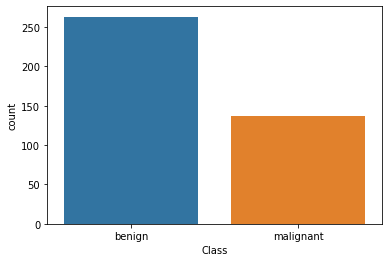

In [162]:
sns.countplot(x = 'Class', data = train)

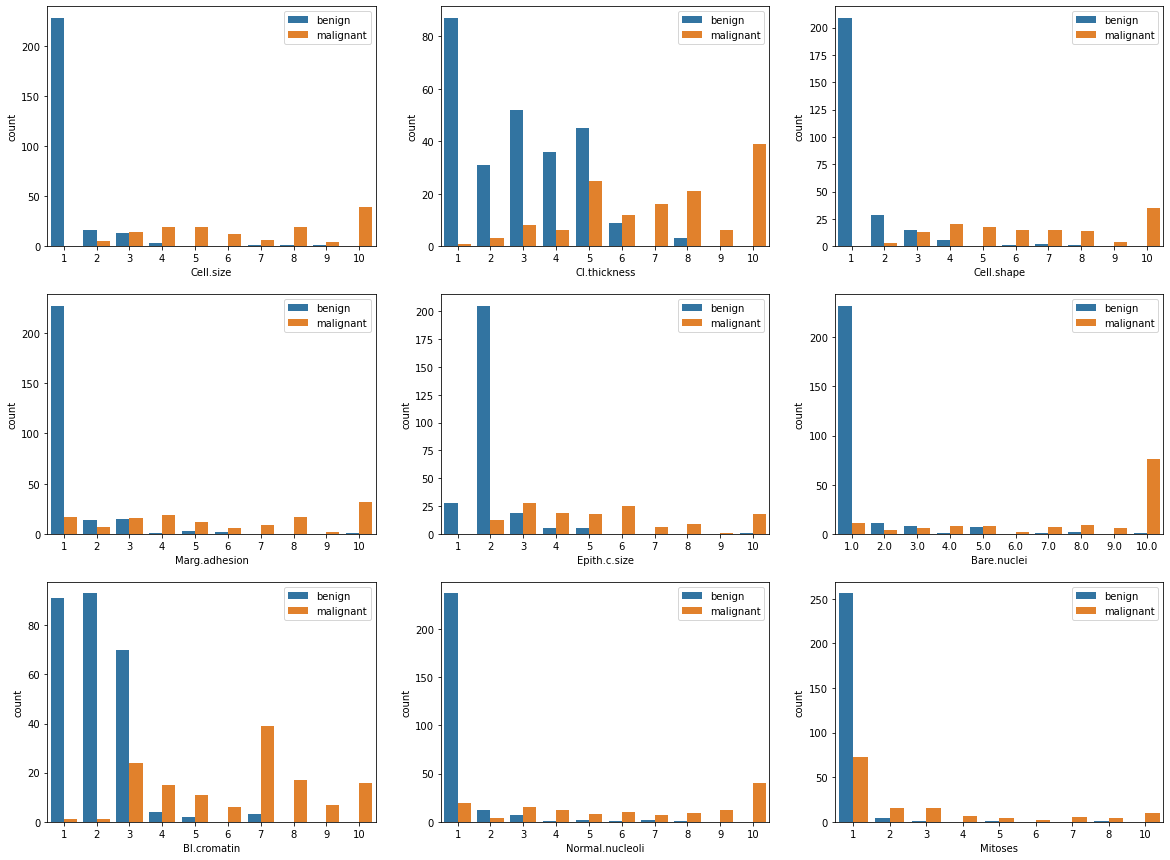

In [163]:
fig = plt.figure(figsize = (20,15))


plt.subplot(3, 3, 1)
sns.countplot(x = 'Cell.size', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 2)
sns.countplot(x = 'Cl.thickness', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 3)
sns.countplot(x = 'Cell.shape', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 4)
sns.countplot(x = 'Marg.adhesion', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 5)
sns.countplot(x = 'Epith.c.size', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 6)
sns.countplot(x = 'Bare.nuclei', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 7)
sns.countplot(x = 'Bl.cromatin', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 8)
sns.countplot(x = 'Normal.nucleoli', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.subplot(3, 3, 9)
sns.countplot(x = 'Mitoses', data=train, hue = 'Class')
plt.legend(loc = 'upper right')
plt.savefig('11.png')

In [164]:
traind = train.replace({'benign': 0, 'malignant': 1})
traind

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,831268,1,1,1,1,1,1.0,1,3,1,0
1,1269574,4,1,1,1,2,1.0,1,1,1,0
2,814265,2,1,1,1,2,1.0,1,1,1,0
3,1227244,1,1,1,1,2,1.0,2,1,1,0
4,822829,8,10,10,10,6,10.0,10,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1182410,3,1,1,1,2,1.0,1,1,1,0
396,837480,7,4,4,3,4,10.0,6,9,1,1
397,1238186,4,1,1,1,2,1.0,2,1,1,0
398,1333063,5,1,3,1,2,1.0,3,1,1,0


In [165]:
testd = test.replace({'benign': 0, 'malignant': 1})
testd

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,0
1,1017122,8,10,10,8,7,10.0,9,7,1,1
2,1018099,1,1,1,1,2,10.0,3,1,1,0
3,1033078,4,2,1,1,2,1.0,2,1,1,0
4,1041801,5,3,3,3,2,3.0,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
294,1371026,5,10,10,10,4,10.0,5,6,3,1
295,1371920,5,1,1,1,2,1.0,3,2,1,0
296,466906,1,1,1,1,2,1.0,1,1,1,0
297,466906,1,1,1,1,2,1.0,1,1,1,0


In [166]:
traind.describe()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,4.000000e+02,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,1.090442e+06,4.320000,3.12500,3.180000,2.822500,3.19750,3.515000,3.480000,2.935000,1.650000,0.34250
std,7.753334e+05,2.824455,3.10055,3.005025,2.916721,2.20696,3.665155,2.566333,3.158435,1.837373,0.47514
min,9.571900e+04,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,8.589560e+05,2.000000,1.00000,1.000000,1.000000,2.00000,1.000000,2.000000,1.000000,1.000000,0.00000
50%,1.174094e+06,4.000000,1.00000,1.000000,1.000000,2.00000,1.000000,3.000000,1.000000,1.000000,0.00000
75%,1.232807e+06,6.000000,5.00000,5.000000,4.000000,4.00000,7.000000,5.000000,4.000000,1.000000,1.00000
max,1.345435e+07,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,1.00000


In [167]:
x_train = traind.drop(columns = ['Class'])
y_train = traind[['Class']]
x_test = testd.drop(columns = ['Class'])
y_test = testd[['Class']]

### LR

In [168]:
X_train = sm.add_constant(x_train)
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logistic_res = logistic.fit(use_t=True)
logistic_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  400
Model:                            GLM   Df Residuals:                      389
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.797
Date:                Thu, 22 Sep 2022   Deviance:                       53.593
Time:                        02:26:12   Pearson chi2:                     256.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6838
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.9453      1.988     -5.002      0.000     -13.854      -6.036
Id              -8.054e-07   1.25e-06     -0.646      0.519   -3.26e-06    1.64e-06
Cl.thickness        0.3736      0.216      1.729      0.085      -0.051       0.798
Cell.size          -0.2762      0.278     -0.993      0.321      -0.823       0.271
Cell.shape          0.5602      0.312      1.793      0.074      -0.054       1.174
Marg.adhesion       0.3652      0.146      2.502      0.013       0.078       0.652
Epith.c.size        0.4170      0.268      1.558      0.120      -0.109       0.943
Bare.nuclei         0.2725      0.122      2.236      0.026       0.033       0.512
Bl.cromatin         0.6336      0.267      2.373      0.018       0.109       1.158
Normal.nucleoli     0.2041      0.160      1.273      0.204      -0.111       0.519
Mitoses             0.3405      0.415      0.820      0.413      -0.476       1.157
===================================================================================
"""

In [169]:
X_test = sm.add_constant(x_test)
y_pred_1 = logistic_res.predict(X_test)
y1 = y_pred_1.to_frame()
y1.loc[y1[0] >= 0.5] = 1
y1.loc[y1[0] < 0.5] = 0
y1

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
294,1.0
295,0.0
296,0.0
297,0.0


In [170]:
classifier = LogisticRegression(penalty='l2', solver='newton-cg')
classifier.fit(x_train, y_train.values.ravel())

y_presk = classifier.predict(x_test)
print(classification_report(y_test, y_presk))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       195
           1       0.94      0.92      0.93       104

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/scipy/optimiz

In [171]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [172]:
print(classification_report(y_test, y1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       195
           1       0.94      0.91      0.93       104

    accuracy                           0.95       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.95      0.95       299



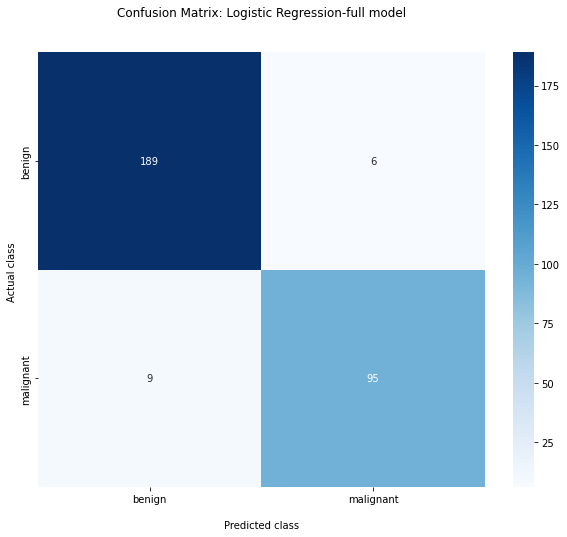

In [173]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y1)

ax = sns.heatmap(cm, annot=True, fmt='.20g',cmap='Blues')

ax.set_title('Confusion Matrix: Logistic Regression-full model\n\n');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class ');

ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

plt.show()

In [174]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

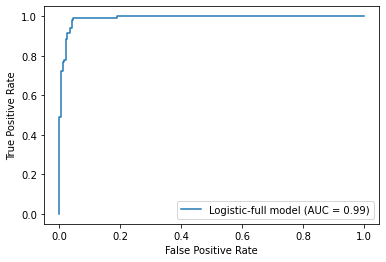

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic_res.predict(X_test), pos_label = 1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic-full model')
display.plot()
plt.show()

In [176]:
x_train_2 = traind.drop(columns = ['Class', 'Id', 'Cell.size', 'Epith.c.size', 'Normal.nucleoli', 'Mitoses'])
y_train_2 = traind[['Class']]
x_test_2 = testd.drop(columns = ['Class', 'Id', 'Cell.size', 'Epith.c.size', 'Normal.nucleoli', 'Mitoses'])
y_test_2 = testd[['Class']]

In [177]:
X_train_2 = sm.add_constant(x_train_2)
logistic2 = sm.GLM(y_train_2, X_train_2, family=sm.families.Binomial())
logistic_res2 = logistic2.fit(use_t=True)
logistic_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.759
Date:                Thu, 22 Sep 2022   Deviance:                       61.519
Time:                        02:26:13   Pearson chi2:                     274.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6775
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.8124      1.497     -6.554      0.000     -12.756      -6.869
Cl.thickness      0.4896      0.194      2.521      0.012       0.108       0.871
Cell.shape        0.4983      0.200      2.495      0.013       0.106       0.891
Marg.adhesion     0.3525      0.124      2.846      0.005       0.109       0.596
Bare.nuclei       0.2903      0.107      2.708      0.007       0.080       0.501
Bl.cromatin       0.7663      0.229      3.339      0.001       0.315       1.217
=================================================================================
"""

In [178]:
X_test_2 = sm.add_constant(x_test_2)
y_pred_2 = logistic_res2.predict(X_test_2)
y2 = y_pred_2.to_frame()
y2.loc[y2[0] >= 0.5] = 1
y2.loc[y2[0] < 0.5] = 0
print(classification_report(y_test_2, y2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       195
           1       0.95      0.92      0.94       104

    accuracy                           0.96       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.96      0.96       299



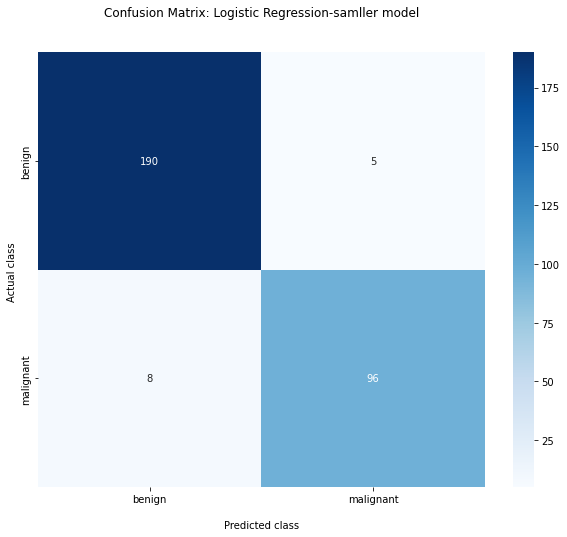

In [179]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test_2, y2)

ax = sns.heatmap(cm, annot=True, fmt='.20g',cmap='Blues')

ax.set_title('Confusion Matrix: Logistic Regression-samller model\n\n');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class ');

ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

plt.show()

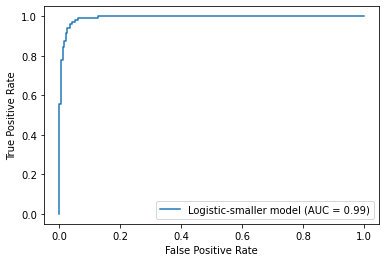

In [180]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_2, logistic_res2.predict(X_test_2))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic-smaller model')
display.plot()
plt.show()

### LDA

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [182]:
x_train = traind.drop(columns = ['Class'])
y_train = traind[['Class']]
x_test = testd.drop(columns = ['Class'])
y_test = testd[['Class']]

In [183]:
clf = LDA(n_components=1) 
clf.fit(x_train, y_train.values.ravel()) 
pre3 = clf.predict(x_test)
p = clf.predict_proba(x_test)
prob = pd.DataFrame(p)
prob[1]

0      9.993102e-01
1      1.000000e+00
2      1.355694e-02
3      1.786784e-06
4      9.940670e-03
           ...     
294    9.999999e-01
295    7.693934e-06
296    6.635973e-08
297    6.635973e-08
298    6.536943e-08
Name: 1, Length: 299, dtype: float64

In [184]:
print(classification_report(y_test, pre3))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       195
           1       0.96      0.88      0.92       104

    accuracy                           0.95       299
   macro avg       0.95      0.93      0.94       299
weighted avg       0.95      0.95      0.95       299



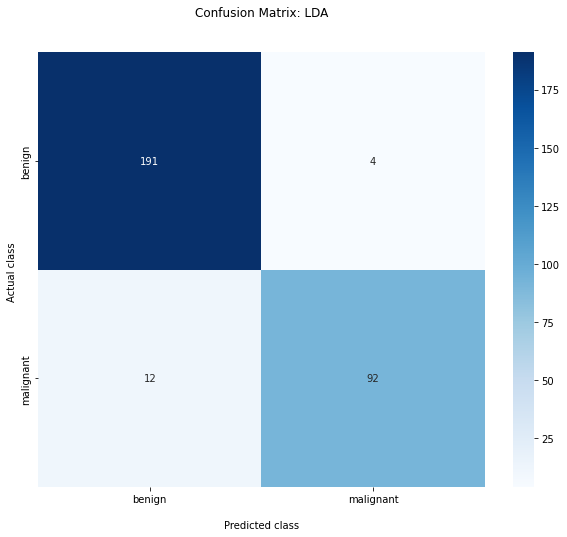

In [185]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, pre3)

ax = sns.heatmap(cm, annot=True, fmt='.20g',cmap='Blues')

ax.set_title('Confusion Matrix: LDA\n\n');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class ');

ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

plt.show()

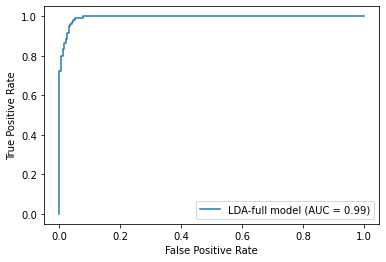

In [186]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='LDA-full model')
display.plot()
plt.show()

In [187]:
x_train_2 = traind.drop(columns = ['Class', 'Id', 'Cell.size', 'Epith.c.size', 'Normal.nucleoli', 'Mitoses'])
y_train_2 = traind[['Class']]
x_test_2 = testd.drop(columns = ['Class', 'Id', 'Cell.size', 'Epith.c.size', 'Normal.nucleoli', 'Mitoses'])
y_test_2 = testd[['Class']]

In [188]:
clf = LDA(n_components=1) 
clf.fit(x_train_2, y_train_2.values.ravel()) 
pre4 = clf.predict(x_test_2)
p1 = clf.predict_proba(x_test_2)
prob1 = pd.DataFrame(p1)
prob1[1]

0      9.947556e-01
1      1.000000e+00
2      3.039077e-02
3      4.924920e-06
4      1.890035e-02
           ...     
294    9.999999e-01
295    2.726278e-05
296    1.850959e-07
297    1.850959e-07
298    1.850959e-07
Name: 1, Length: 299, dtype: float64

In [189]:
print(classification_report(y_test_2, pre4))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       195
           1       0.97      0.88      0.92       104

    accuracy                           0.95       299
   macro avg       0.95      0.93      0.94       299
weighted avg       0.95      0.95      0.95       299



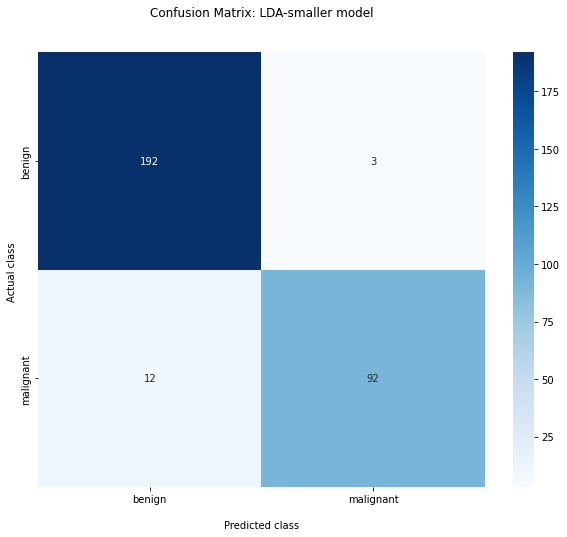

In [190]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test_2, pre4)

ax = sns.heatmap(cm, annot=True, fmt='.20g',cmap='Blues')

ax.set_title('Confusion Matrix: LDA-smaller model\n\n');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class ');

ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

plt.show()

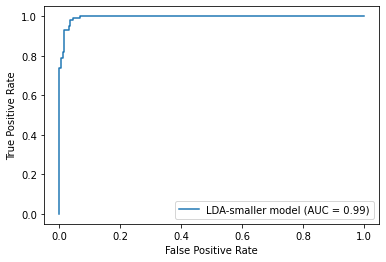

In [191]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_2, prob1[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='LDA-smaller model')
display.plot()
plt.show()

### QDA

In [192]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [193]:
clf = QDA()
clf.fit(x_train, y_train.values.ravel()) 
pre5 = clf.predict(x_test)
p3 = clf.predict_proba(x_test)
prob3 = pd.DataFrame(p3)
prob3[1]

0      1.000000e+00
1      1.000000e+00
2      1.000000e+00
3      6.286516e-07
4      1.815235e-03
           ...     
294    1.000000e+00
295    4.552390e-07
296    8.004191e-09
297    8.004191e-09
298    1.010644e-08
Name: 1, Length: 299, dtype: float64

In [194]:
print(classification_report(y_test, pre5))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       195
           1       0.86      0.96      0.91       104

    accuracy                           0.93       299
   macro avg       0.92      0.94      0.93       299
weighted avg       0.94      0.93      0.93       299



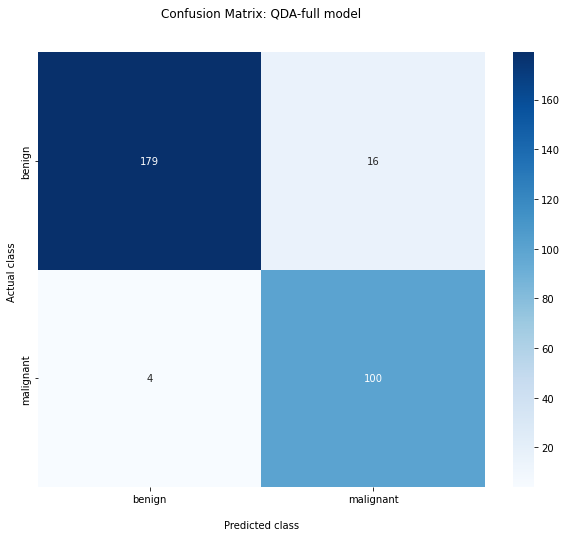

In [195]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, pre5)

ax = sns.heatmap(cm, annot=True, fmt='.20g',cmap='Blues')

ax.set_title('Confusion Matrix: QDA-full model\n\n');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class ');

ax.xaxis.set_ticklabels(['benign','malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

plt.show()

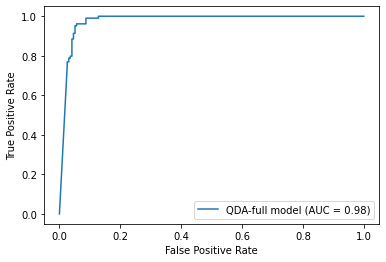

In [196]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob3[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='QDA-full model')
display.plot()
plt.show()

In [197]:
x_train = traind.drop(columns = ['Class'])
x_train.to_csv('Desktop/x_train_1.csv',index=False)

y_train = traind[['Class']]
y_train.to_csv('Desktop/y_train.csv',index=False)

x_test = testd.drop(columns = ['Class'])
x_test.to_csv('Desktop/x_test_1.csv',index=False)

y_test = testd[['Class']]
y_test.to_csv('Desktop/y_test.csv',index=False)

x_train_2 = traind.drop(columns = ['Class', 'Id', 'Cell.size', 'Epith.c.size', 'Normal.nucleoli', 'Mitoses'])
x_train_2.to_csv('Desktop/x_train_2.csv',index=False)

x_test_2 = testd.drop(columns = ['Class', 'Id', 'Cell.size', 'Epith.c.size', 'Normal.nucleoli', 'Mitoses'])
x_test_2.to_csv('Desktop/x_test_2.csv',index=False)
